# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

#### Important: Restart the Kernel before you move on to the next step.

## Imports

In [23]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [24]:
# Define transforms
## YOUR CODE HERE ##
transforms = transforms.ToTensor()

# Create training set and define training dataloader
## YOUR CODE HERE ##
training_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transforms)
training_loader = DataLoader(training_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
testing_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transforms)
testing_loader = DataLoader(testing_data, batch_size=100, shuffle=True)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

As our data is in images, for a better understanding and processing we converted the images into multidimentional arrays which are tensors


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [25]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:10]
    images = batch[0][0:10]
    for i in range(10):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [26]:
# Explore data
## YOUR CODE HERE ##
print("Number of training  data examples of MNIST: {}".format(len(training_data)))
print("Number of testing data examples of MNIST: {}".format(len(testing_data)))

Number of training  data examples of MNIST: 60000
Number of testing data examples of MNIST: 10000


In [27]:
data = iter(training_loader)
images, labels = next(data)

print("number of images in training: {}".format(images.shape))
print("number of labels in training: {}".format(labels.shape))

number of images in training: torch.Size([100, 1, 28, 28])
number of labels in training: torch.Size([100])


1


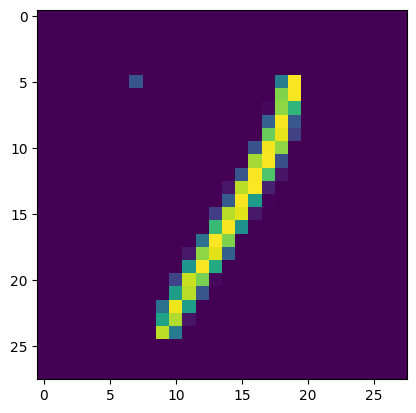

9


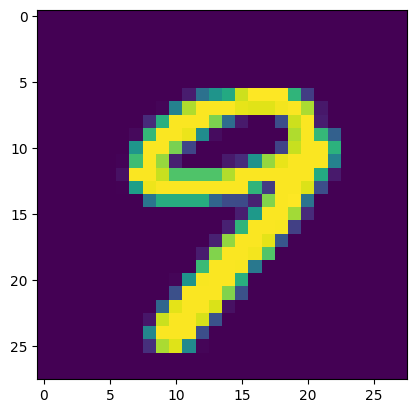

5


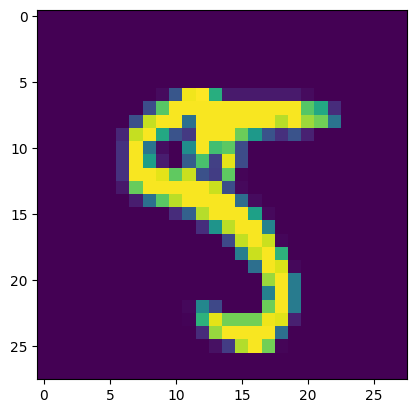

1


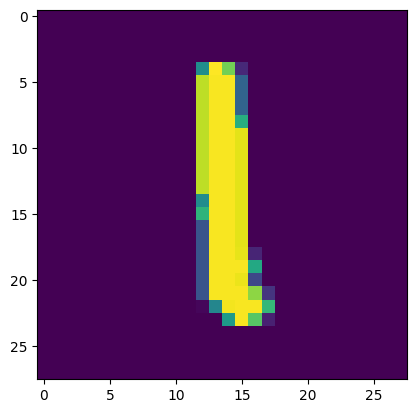

3


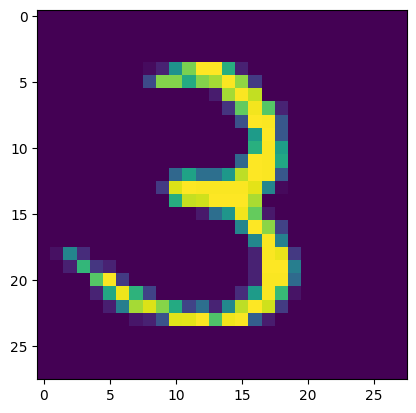

7


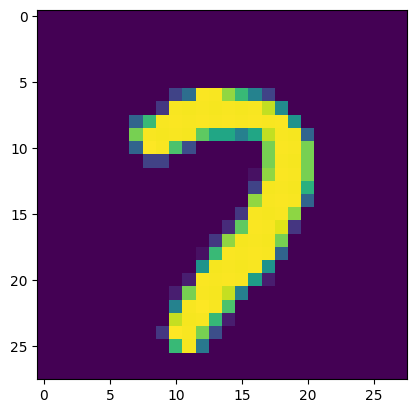

4


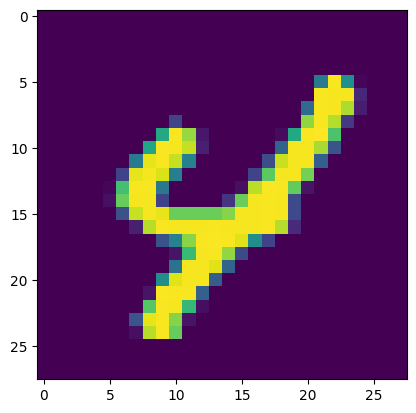

5


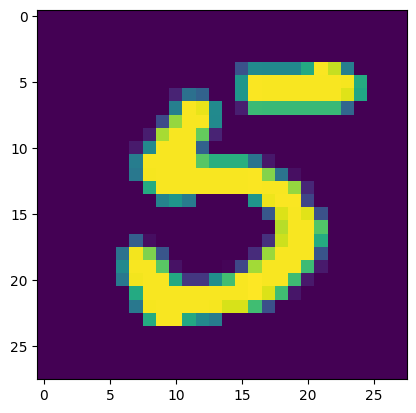

8


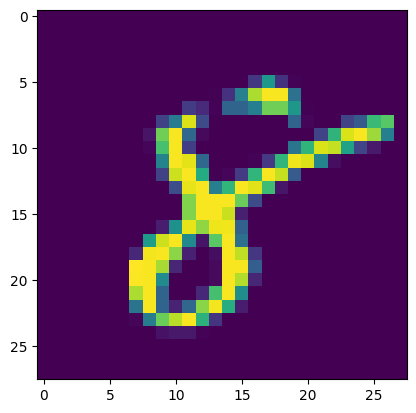

4


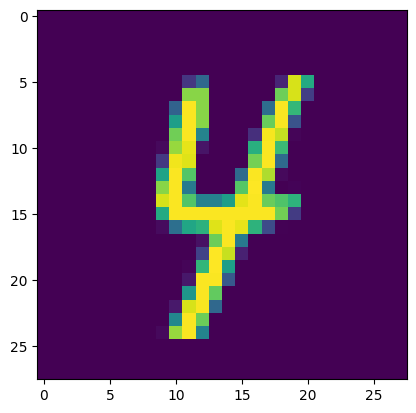

In [28]:
show(training_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [29]:
## YOUR CODE HERE ##
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.activation = F.relu
    self.layer1 = nn.Linear(28*28, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64,10)
  def forward(self,i):
    i = torch.flatten(i,1)
    i = self.activation(self.layer1(i))
    i = self.activation(self.layer2(i))
    i = self.layer3(i)
    return i

net = Network()


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.


In [30]:
# choosing an optimizer

optimizer = optim.Adam(net.parameters(), lr=0.001)

# chossing an Loss function

criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [32]:
epochs = 10

## establishing history lists

training_loss_history = list()
validating_loss_history = list()

for epoch in range(epochs):
  net.train()
  training_loss = 0.0
  training_correct = 0
  for i, data in enumerate(training_loader):

    inputs, labels = data

    # taking zero out of gradients of the optimizer
    optimizer.zero_grad()

    # computing loss based on outputs
    outputs = net(inputs)
    loss = criterion(outputs,labels)

    # Computing the loss gradient & taking a step back
    loss.backward()
    optimizer.step()

    z, preds = torch.max(outputs.data, 1)
    training_correct += (preds==labels).sum().item()

    training_loss += loss.item()
  print(f'Epoch {epoch + 1} validation accuracy: {training_correct/len(training_loader):.2f}% training loss: {training_loss/len(training_loader):.5f}')
  training_loss_history.append(training_loss/len(training_loader))

  # validating the data

  validating_loss = 0.0
  validating_correct = 0
  net.eval()
  for inputs, labels in testing_loader:
    outputs = net(inputs)
    z, preds = torch.max(outputs.data, 1)
    validating_correct += (preds==labels).sum().item()
    validating_loss += loss.item()
  print(f'Epoch {epoch + 1} validation accuracy: {validating_correct/len(testing_loader):.2f}% validation loss: {validating_loss/len(testing_loader):.5f}')
  validating_loss_history.append(validating_loss/len(testing_loader))

Epoch 1 validation accuracy: 89.26% training loss: 0.39039
Epoch 1 validation accuracy: 94.26% validation loss: 0.24975
Epoch 2 validation accuracy: 95.18% training loss: 0.16667
Epoch 2 validation accuracy: 95.82% validation loss: 0.08432
Epoch 3 validation accuracy: 96.55% training loss: 0.11641
Epoch 3 validation accuracy: 96.48% validation loss: 0.08006
Epoch 4 validation accuracy: 97.38% training loss: 0.08669
Epoch 4 validation accuracy: 96.63% validation loss: 0.09720
Epoch 5 validation accuracy: 97.92% training loss: 0.06837
Epoch 5 validation accuracy: 97.58% validation loss: 0.02691
Epoch 6 validation accuracy: 98.29% training loss: 0.05576
Epoch 6 validation accuracy: 97.68% validation loss: 0.05438
Epoch 7 validation accuracy: 98.61% training loss: 0.04521
Epoch 7 validation accuracy: 97.74% validation loss: 0.03925
Epoch 8 validation accuracy: 98.83% training loss: 0.03742
Epoch 8 validation accuracy: 97.62% validation loss: 0.00883
Epoch 9 validation accuracy: 99.11% trai

Plot the training loss (and validation loss/accuracy, if recorded).

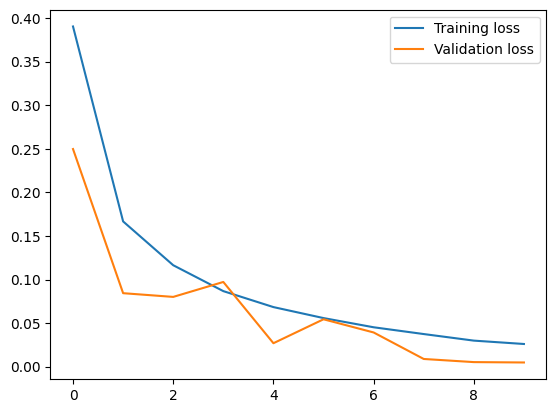

In [33]:
# plotting training and validation loss history #
plt.plot(training_loss_history, label="Training loss")
plt.plot(validating_loss_history, label="Validation loss")
plt.legend()
plt.show()



## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [34]:
def testing():
  net.eval()
  testing_loss = 0
  testing_correct = 0
  for i, data in enumerate(testing_loader):
    inputs,labels = data

    optimizer.zero_grad()

    outputs = net(inputs)

    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    z, preds = torch.max(outputs.data, 1)
    testing_correct += (preds == labels).sum().item()
    testing_loss += loss.item()
  print(f'Epoch {epoch + 1} test accuracy: {testing_correct/len(testing_loader):.2f}% test loss: {testing_loss/len(testing_loader):.5f}')

for epoch in range(epochs):
  testing()

Epoch 1 test accuracy: 97.57% test loss: 0.08072
Epoch 2 test accuracy: 99.04% test loss: 0.03102
Epoch 3 test accuracy: 99.56% test loss: 0.01722
Epoch 4 test accuracy: 99.78% test loss: 0.01096
Epoch 5 test accuracy: 99.94% test loss: 0.00634
Epoch 6 test accuracy: 99.98% test loss: 0.00445
Epoch 7 test accuracy: 100.00% test loss: 0.00306
Epoch 8 test accuracy: 99.99% test loss: 0.00252
Epoch 9 test accuracy: 100.00% test loss: 0.00207
Epoch 10 test accuracy: 100.00% test loss: 0.00177


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [35]:
## YOUR CODE HERE ##
class Network2(nn.Module):
  def __init__(self):
    super(Network2, self).__init__()
    self.activation = F.relu
    self.layer1 = nn.Linear(28*28, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64,10)
    # added droput and batch normalizations
    self.droput = nn.Dropout(0.2)
    self.batchnorm1 = nn.BatchNorm1d(128)
    self.batchnorm2 = nn.BatchNorm1d(64)

  def forward(self,i):
    i = torch.flatten(i,1)
    i = self.activation(self.batchnorm1(self.layer1(i)))
    i = self.activation(self.batchnorm2(self.layer2(i)))
    i = self.layer3(i)
    return i

net2 = Network2()


In [36]:
# choosing an optimizer

optimizer = optim.Adam(net2.parameters(), lr=0.001)

# chossing an Loss function

criterion = nn.CrossEntropyLoss()

In [37]:
epochs = 10

## establishing history lists

training_loss_history = list()
validating_loss_history = list()

for epoch in range(epochs):
  net2.train()
  training_loss = 0.0
  training_correct = 0
  for i, data in enumerate(training_loader):

    inputs, labels = data

    # taking zero out of gradients of the optimizer
    optimizer.zero_grad()

    # computing loss based on outputs
    outputs = net2(inputs)
    loss = criterion(outputs,labels)

    # Computing the loss gradient & taking a step back
    loss.backward()
    optimizer.step()

    z, preds = torch.max(outputs.data, 1)
    training_correct += (preds==labels).sum().item()

    training_loss += loss.item()
  print(f'Epoch {epoch + 1} validation accuracy: {training_correct/len(training_loader):.2f}% training loss: {training_loss/len(training_loader):.5f}')
  training_loss_history.append(training_loss/len(training_loader))

  # validating the data

  validating_loss = 0.0
  validating_correct = 0
  net2.eval()
  for inputs, labels in testing_loader:
    outputs = net2(inputs)
    z, preds = torch.max(outputs.data, 1)
    validating_correct += (preds==labels).sum().item()
    validating_loss += loss.item()
  print(f'Epoch {epoch + 1} validation accuracy: {validating_correct/len(testing_loader):.2f}% validation loss: {validating_loss/len(testing_loader):.5f}')
  validating_loss_history.append(validating_loss/len(testing_loader))

Epoch 1 validation accuracy: 93.22% training loss: 0.28296
Epoch 1 validation accuracy: 96.84% validation loss: 0.04560
Epoch 2 validation accuracy: 97.21% training loss: 0.09575
Epoch 2 validation accuracy: 97.29% validation loss: 0.06912
Epoch 3 validation accuracy: 98.03% training loss: 0.06482
Epoch 3 validation accuracy: 97.67% validation loss: 0.02187
Epoch 4 validation accuracy: 98.44% training loss: 0.04838
Epoch 4 validation accuracy: 97.89% validation loss: 0.03058
Epoch 5 validation accuracy: 98.76% training loss: 0.03916
Epoch 5 validation accuracy: 97.73% validation loss: 0.05397
Epoch 6 validation accuracy: 98.94% training loss: 0.03221
Epoch 6 validation accuracy: 97.85% validation loss: 0.02787
Epoch 7 validation accuracy: 99.20% training loss: 0.02639
Epoch 7 validation accuracy: 97.66% validation loss: 0.00894
Epoch 8 validation accuracy: 99.28% training loss: 0.02256
Epoch 8 validation accuracy: 97.96% validation loss: 0.01634
Epoch 9 validation accuracy: 99.36% trai

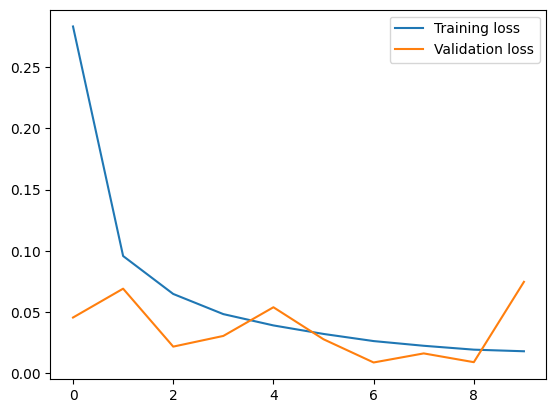

In [38]:
# plotting training and validation loss history #
plt.plot(training_loss_history, label="Training loss")
plt.plot(validating_loss_history, label="Validation loss")
plt.legend()
plt.show()



In [39]:
# testing the improvised model
def testing2():
  net2.eval()
  testing_loss = 0
  testing_correct = 0
  for i, data in enumerate(testing_loader):
    inputs,labels = data

    optimizer.zero_grad()

    outputs = net2(inputs)

    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    z, preds = torch.max(outputs.data, 1)
    testing_correct += (preds == labels).sum().item()
    testing_loss += loss.item()
  print(f'Epoch {epoch + 1} test accuracy: {testing_correct/len(testing_loader):.2f}% test loss: {testing_loss/len(testing_loader):.5f}')

for epoch in range(epochs):
  testing2()

Epoch 1 test accuracy: 97.03% test loss: 0.10355
Epoch 2 test accuracy: 98.68% test loss: 0.03715
Epoch 3 test accuracy: 99.87% test loss: 0.00753
Epoch 4 test accuracy: 99.93% test loss: 0.00362
Epoch 5 test accuracy: 99.99% test loss: 0.00188
Epoch 6 test accuracy: 100.00% test loss: 0.00091
Epoch 7 test accuracy: 100.00% test loss: 0.00067
Epoch 8 test accuracy: 100.00% test loss: 0.00056
Epoch 9 test accuracy: 100.00% test loss: 0.00048
Epoch 10 test accuracy: 100.00% test loss: 0.00042


## Saving your model
Using `torch.save`, save your model for future loading.

In [40]:
# saving the models #
torch.save(Network, "Network.pth")
torch.save(Network2, "Network2.pth")